In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [2]:
df=pd.read_excel("/content/drive/MyDrive/Machine Learning/Datasets/AnomaData.xlsx")
df

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,1999-05-28 23:58:00,0,-0.877441,0.786430,0.406426,135.301215,0.112295,26.300392,-0.159185,0.058823,...,29.984624,-0.773514,2.682413,6.944644,-37.795661,-0.860218,0.010220,0.895685,-0.011242,0
18394,1999-05-29 00:00:00,0,-0.843988,0.633086,0.561918,133.228949,0.141332,25.678597,-0.159185,0.058823,...,29.984624,-0.773514,2.683338,0.507755,-39.357199,-0.915698,0.010620,0.175348,-0.011235,0
18395,1999-05-29 00:02:00,0,-0.826547,0.450126,0.334582,134.977973,0.170370,25.056801,-0.159185,0.048752,...,29.984624,-0.773514,2.684263,2.809146,-39.357199,-1.409596,0.013323,0.621020,-0.011228,0
18396,1999-05-29 00:04:00,0,-0.822843,0.419383,0.387263,135.658942,0.199422,24.435005,-0.159185,0.048752,...,29.984624,-0.773514,2.685189,2.164859,-39.357199,-0.860218,0.012888,1.390902,-0.011221,0


In [3]:
# Display the first few rows only
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [4]:
# Some information and summary of the data
print(df.info)
print(df.describe())

<bound method DataFrame.info of                      time  y        x1        x2        x3          x4  \
0     1999-05-01 00:00:00  0  0.376665 -4.596435 -4.095756   13.497687   
1     1999-05-01 00:02:00  0  0.475720 -4.542502 -4.018359   16.230659   
2     1999-05-01 00:04:00  0  0.363848 -4.681394 -4.353147   14.127997   
3     1999-05-01 00:06:00  0  0.301590 -4.758934 -4.023612   13.161566   
4     1999-05-01 00:08:00  0  0.265578 -4.749928 -4.333150   15.267340   
...                   ... ..       ...       ...       ...         ...   
18393 1999-05-28 23:58:00  0 -0.877441  0.786430  0.406426  135.301215   
18394 1999-05-29 00:00:00  0 -0.843988  0.633086  0.561918  133.228949   
18395 1999-05-29 00:02:00  0 -0.826547  0.450126  0.334582  134.977973   
18396 1999-05-29 00:04:00  0 -0.822843  0.419383  0.387263  135.658942   
18397 1999-05-29 00:06:00  0 -0.840981  0.582710  0.593416  136.339880   

             x5         x6        x7        x8  ...        x51        x52  \
0 

Interpreting the summary

In [5]:
# Features: A timestamp column (time), a target column (y), and multiple predictive features labeled from x1 to x60.
# All predictors are numerical, with the majority being float64 types, and a few as integers.
# Target Label: The column y, which is binary (0 or 1) and indicates anomalies.

Dropping insignificant columns

In [6]:
# Drop the redundant column 'y.1'
df = df.drop(columns=['y.1'])

Handling Missing Values

In [7]:
# Check for any missing values across the dataset
missing_values = df.isnull().sum().sum()
missing_values

0

Checking any duplicate entries

In [8]:
# Display summary of basic cleanup and check for duplicates
print(df.shape)
print(df.duplicated().sum())

(18398, 61)
0


Interpreting above findings

In [9]:
# The dataset now has 18,398 rows and 61 columns (after removing the duplicate y.1 column).
# There are no missing values.
# No duplicate rows were found.

Understanding the Data Visually

<ipython-input-10-08160eee2014>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='viridis')


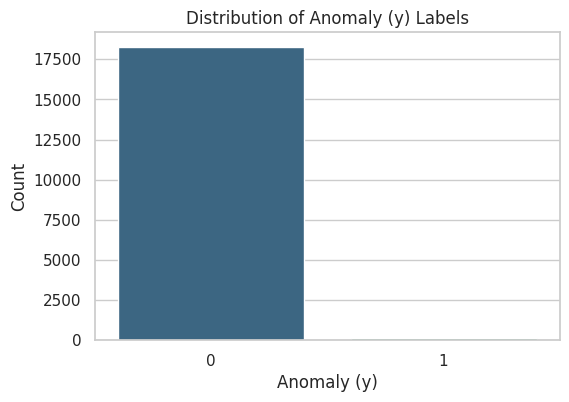

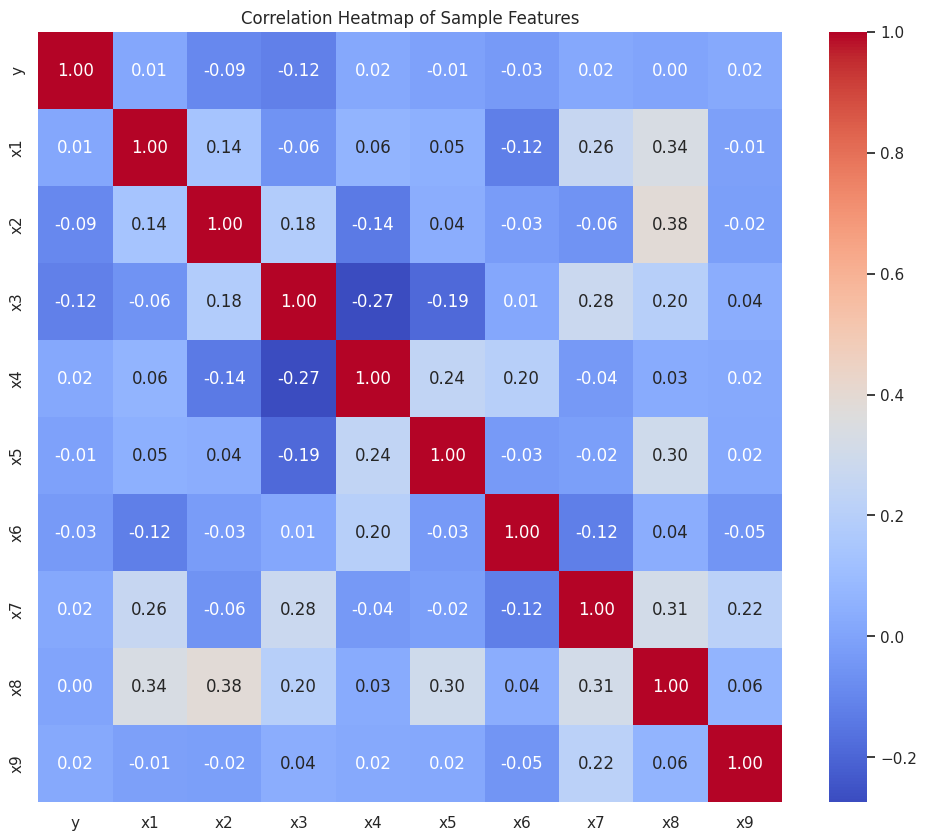

In [10]:
# Set up visualization style
sns.set(style="whitegrid")

# Plot the distribution of the target variable 'y' to understand the class balance
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, palette='viridis')
plt.title('Distribution of Anomaly (y) Labels')
plt.xlabel('Anomaly (y)')
plt.ylabel('Count')
plt.show()

# Display correlation heatmap of a sample of features to identify strong relationships
plt.figure(figsize=(12, 10))
correlation_sample = df.iloc[:, 1:11].corr()  # Using the first 10 predictors for readability
sns.heatmap(correlation_sample, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Sample Features')
plt.show()

Interpretation based on Correlation Heatmap

In [11]:
# The target variable y (indicating anomalies) shows an imbalance, with significantly more instances labeled as non-anomalies (y = 0) than anomalies (y = 1).
# This imbalance suggests that we’ll need to consider techniques like SMOTE or adjusting evaluation metrics to handle the skewed distribution.
# In the sample correlation heatmap, some features show moderate to strong correlations. High correlation between features could lead to multicollinearity, potentially affecting model performance.
# We may consider dimensionality reduction techniques or carefully select features for modeling.

Distribution of Sample Features

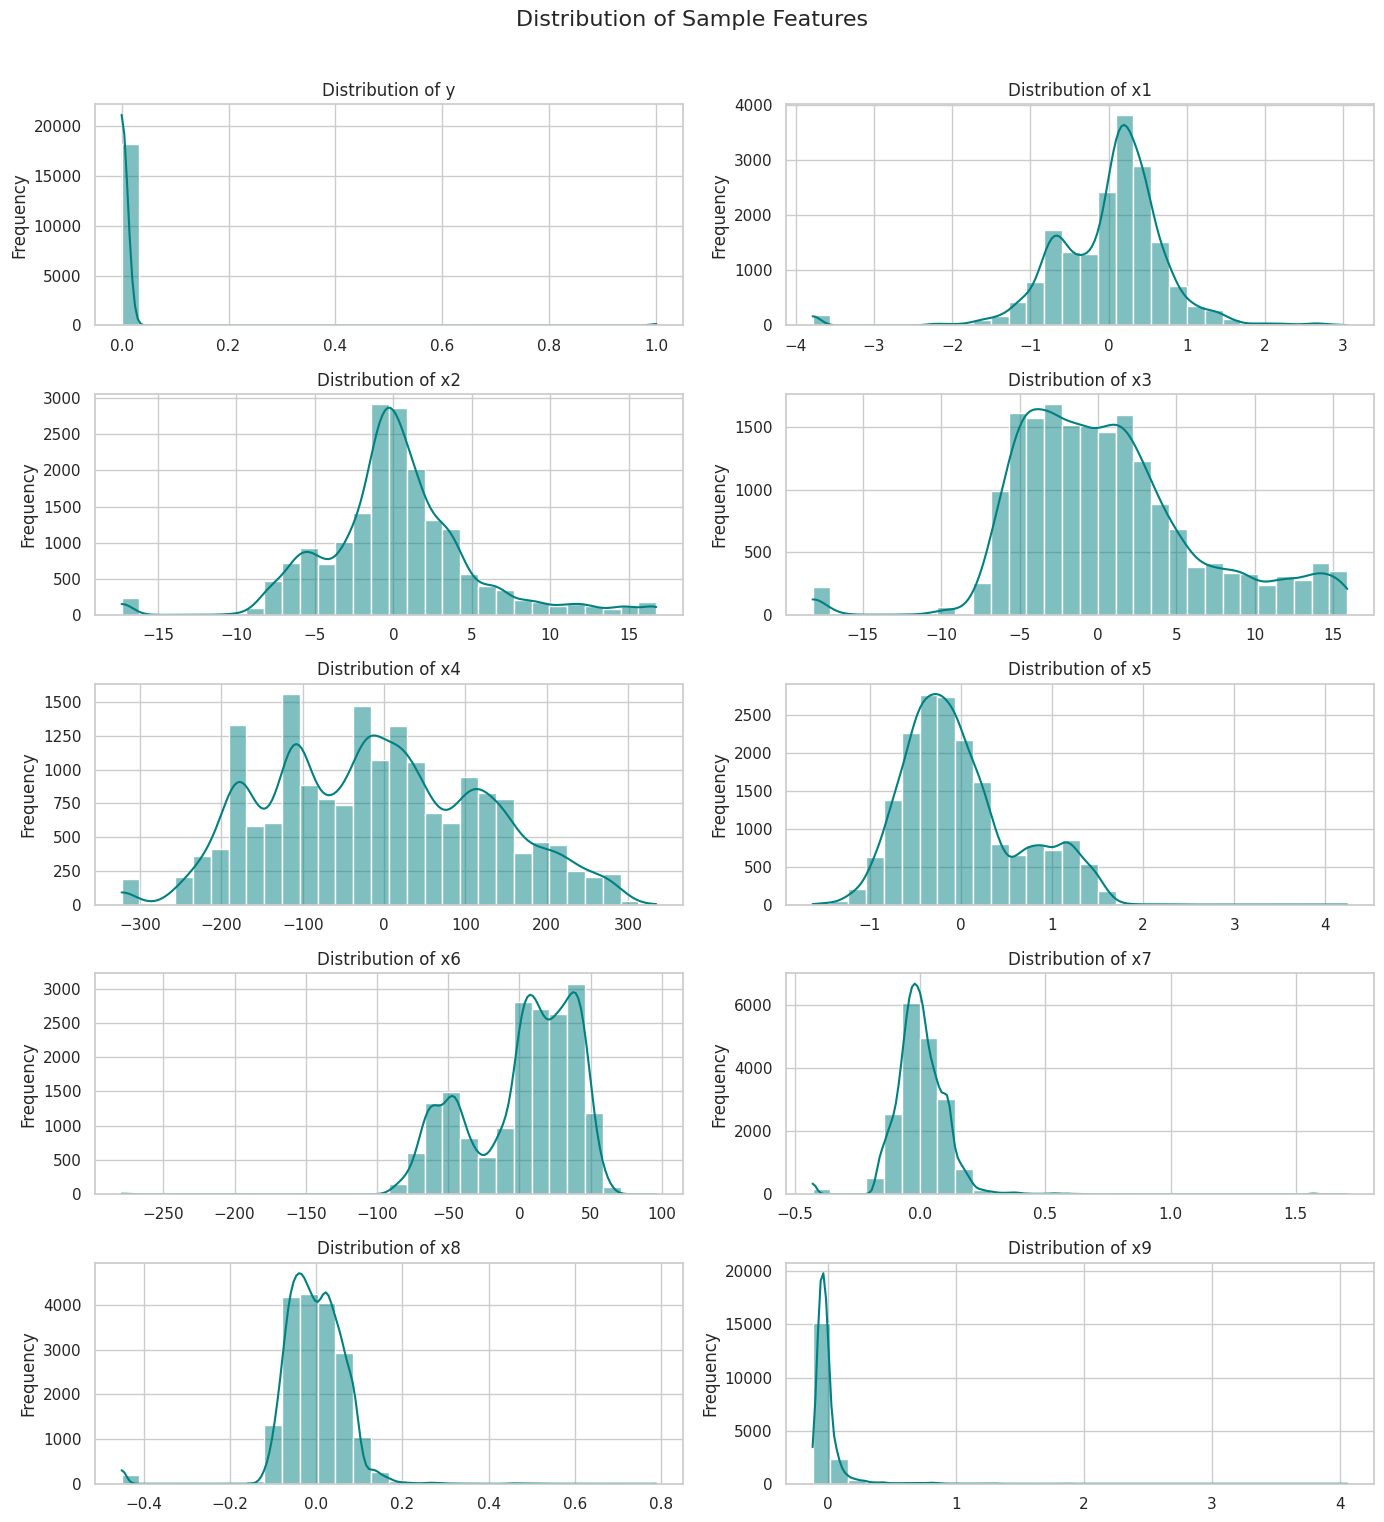

In [12]:
# Plot histograms for a sample of features to analyze their distributions
sample_features = df.columns[1:11]  # Selecting a sample of 10 features for visualization
fig, axes = plt.subplots(5, 2, figsize=(14, 16))
fig.suptitle('Distribution of Sample Features', fontsize=16)

for i, feature in enumerate(sample_features):
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[i // 2, i % 2], color='teal')
    axes[i // 2, i % 2].set_title(f'Distribution of {feature}')
    axes[i // 2, i % 2].set_xlabel('')
    axes[i // 2, i % 2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


Scatter Plots for Feature Pairs

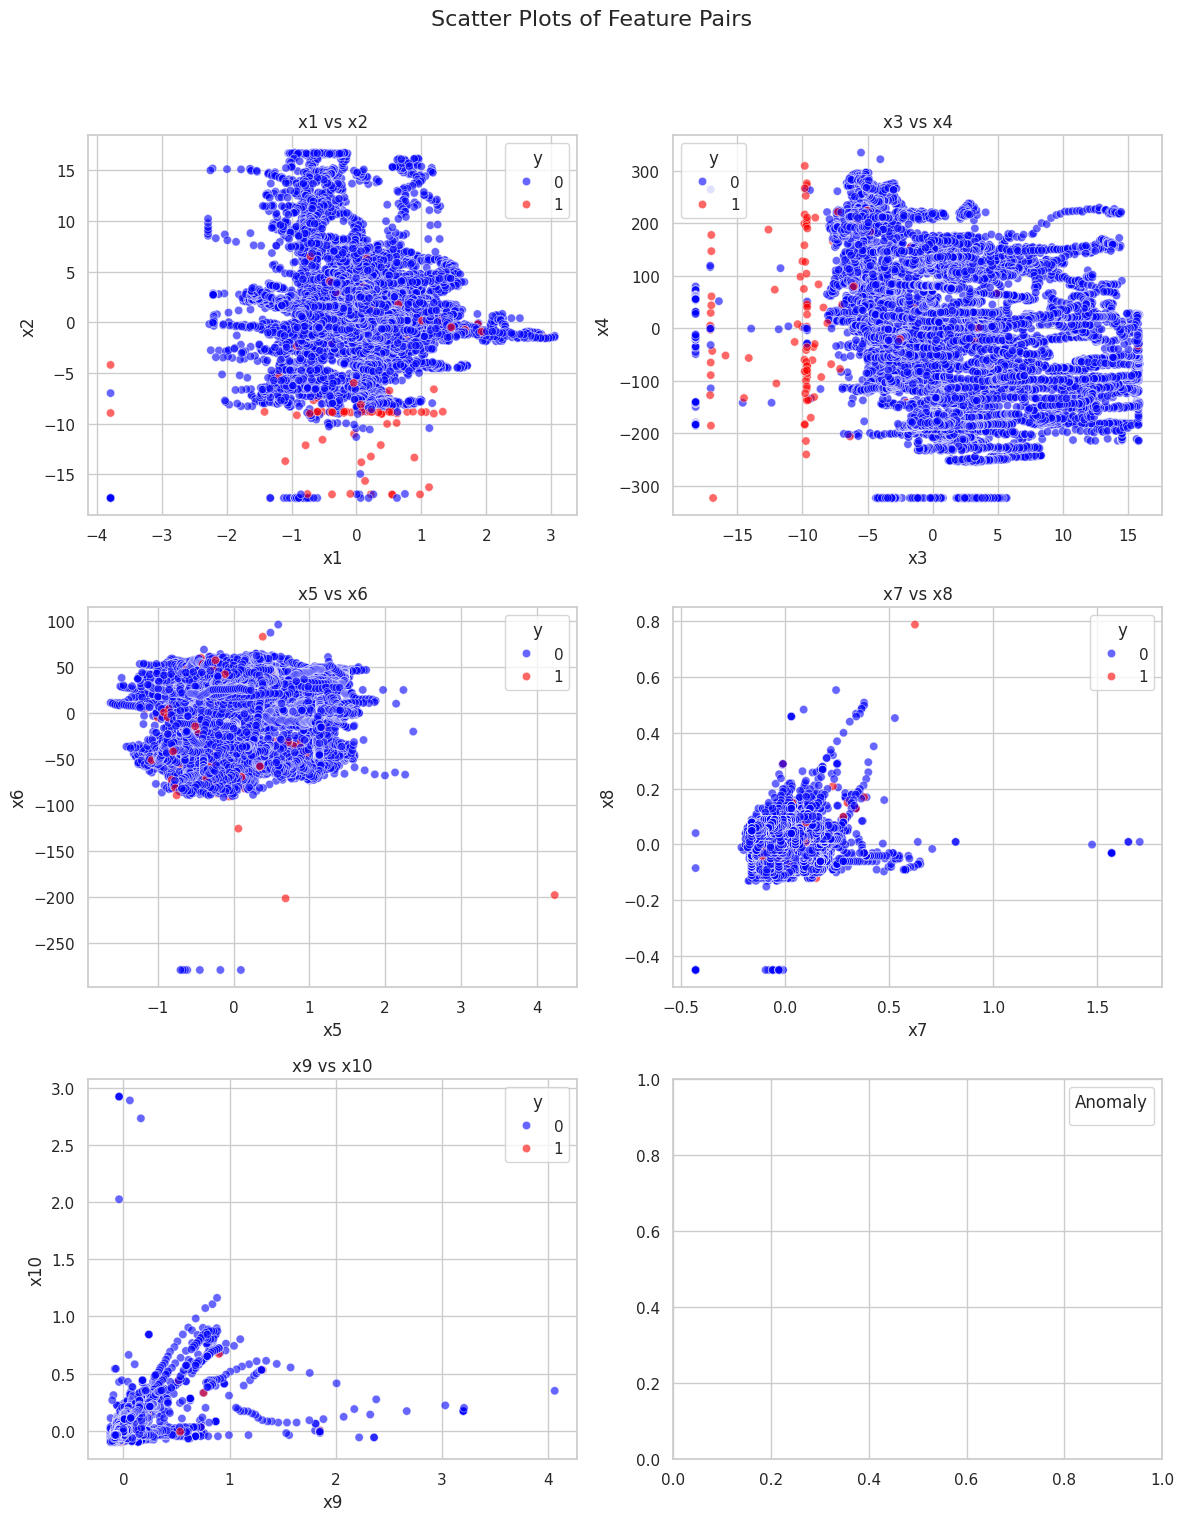

In [13]:
# Scatter plots for pairs of features, colored by the anomaly label 'y'
feature_pairs = [('x1', 'x2'), ('x3', 'x4'), ('x5', 'x6'), ('x7', 'x8'), ('x9', 'x10')]

fig, axes = plt.subplots(3, 2, figsize=(12, 16))
fig.suptitle('Scatter Plots of Feature Pairs', fontsize=16)

for i, (x_feat, y_feat) in enumerate(feature_pairs):
    sns.scatterplot(
        data=df, x=x_feat, y=y_feat, hue='y', palette={0: 'blue', 1: 'red'}, alpha=0.6, ax=axes[i // 2, i % 2]
    )
    axes[i // 2, i % 2].set_title(f'{x_feat} vs {y_feat}')
    axes[i // 2, i % 2].set_xlabel(x_feat)
    axes[i // 2, i % 2].set_ylabel(y_feat)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.legend(title='Anomaly')
plt.show()


In [14]:
# Pair 1 (x1 vs x2)
# If points representing y=1 are concentrated in a specific area compared to those for y=0,
# it suggests that this feature pair is effective at distinguishing anomalies.
# Pair 2 (x3 vs x4)
# A wide spread of both classes across the scatter plot may imply
# that these features do not provide much information in separating normal from anomalous cases.
# Pair 3 (x5 vs x6)
# A noticeable overlap between the two classes could indicate that additional features might be needed to improve separation.

Correlation Heatmap of Features

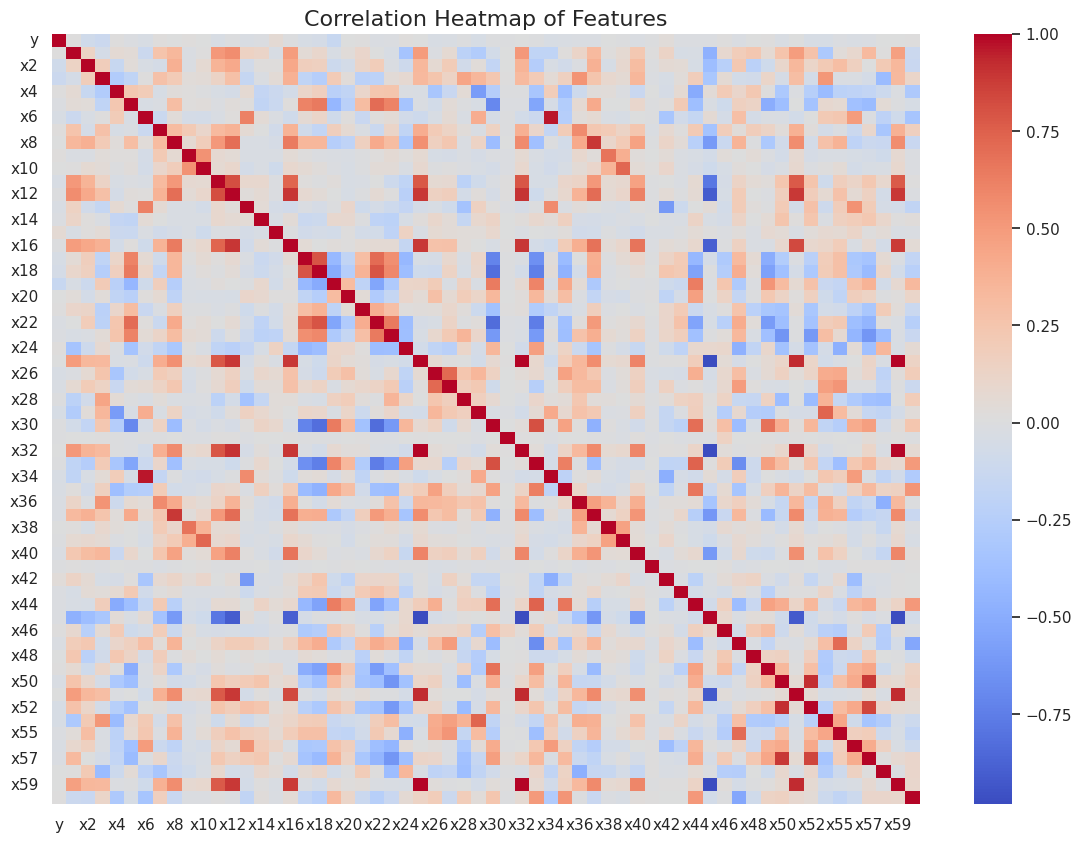

[('x6', 'x34'),
 ('x12', 'x32'),
 ('x12', 'x45'),
 ('x25', 'x32'),
 ('x25', 'x45'),
 ('x25', 'x51'),
 ('x25', 'x59'),
 ('x32', 'x45'),
 ('x32', 'x51'),
 ('x32', 'x59'),
 ('x45', 'x51'),
 ('x45', 'x59'),
 ('x50', 'x52'),
 ('x51', 'x59')]

In [15]:
# Calculate the correlation matrix for the dataset
correlation_matrix = df.iloc[:, 1:].corr()  # Exclude the target column 'y' from the analysis

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

# Identifying highly correlated features (correlation > 0.9)
high_corr_pairs = []
threshold = 0.9
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j]))

high_corr_pairs

Feature Importance based on mutual information

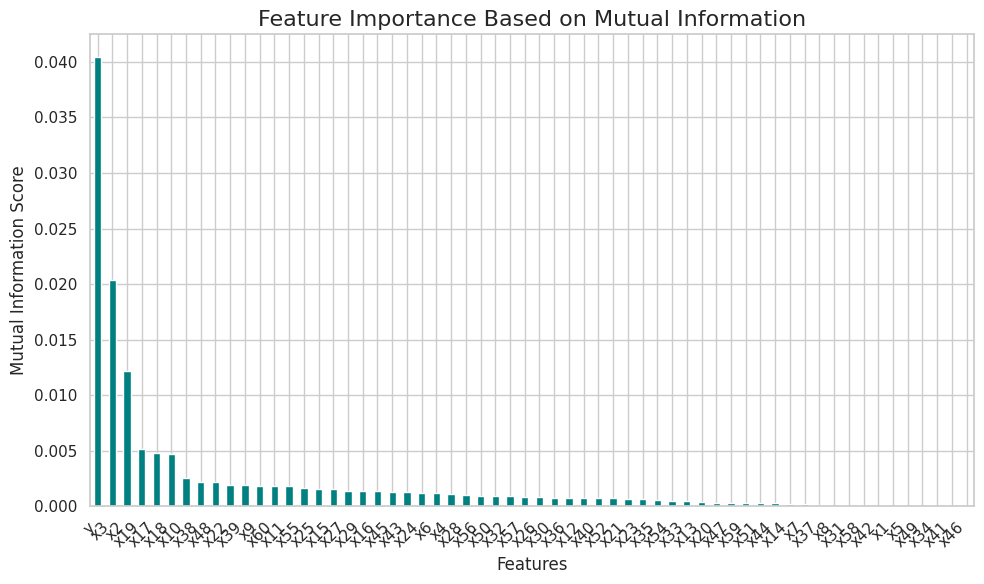

,0
y,0.040442
x3,0.020348
x2,0.012218
x19,0.005195
x17,0.004830
x18,0.004764
x10,0.002569
x38,0.002175
x48,0.002158
x22,0.001939


In [16]:
from sklearn.feature_selection import mutual_info_classif

# Separating predictors and the target variable
X = df.iloc[:, 1:]  # Features (excluding 'y')
y = df['y']         # Target variable

# Calculating mutual information for each feature
mutual_info = mutual_info_classif(X, y, random_state=42)
mutual_info_series = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

# Visualizing feature importance based on mutual information
plt.figure(figsize=(10, 6))
mutual_info_series.plot(kind='bar', color='teal')
plt.title('Feature Importance Based on Mutual Information', fontsize=16)
plt.ylabel('Mutual Information Score')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display top features based on mutual information
mutual_info_series.head(10)

Feature Importance

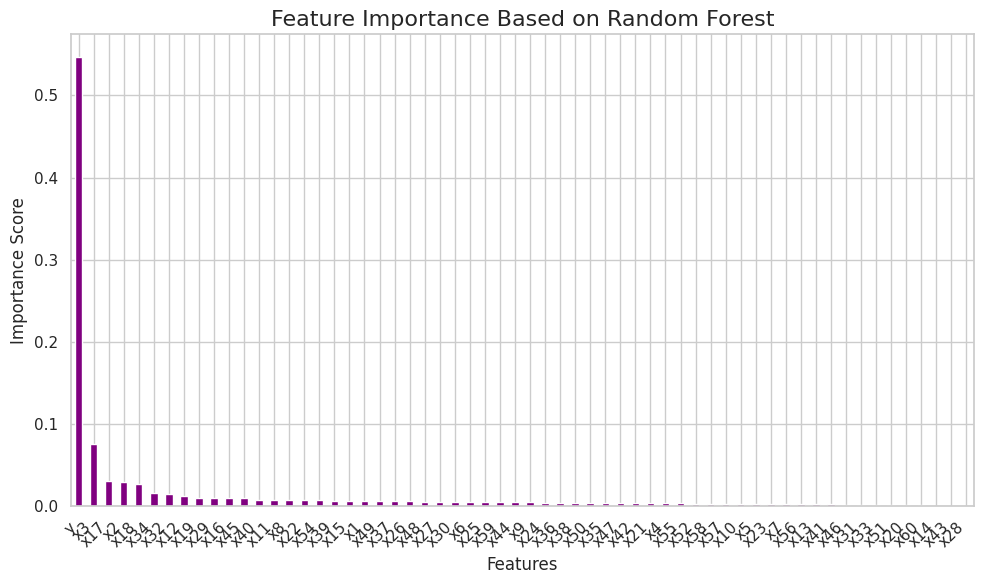

,0
y,0.546750
x3,0.075386
x17,0.031570
x2,0.030014
x18,0.027407
x34,0.016234
x32,0.014995
x12,0.012687
x19,0.010878
x29,0.010732


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X, y)

# Extract feature importances
feature_importances = pd.Series(random_forest.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='purple')
plt.title('Feature Importance Based on Random Forest', fontsize=16)
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display top features
feature_importances.head(10)

Feature Engineering

In [17]:
# Separating predictors and the target variable again
X = df.iloc[:, 1:]  # Features (excluding 'y')
y = df['y']         # Target variable

# Identifying outliers using the Interquartile Range (IQR) method for numeric features
outlier_info = {}

for column in X.columns:
    Q1 = X[column].quantile(0.25)  # First quartile
    Q3 = X[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

    # Identifying outliers
    outliers = X[(X[column] < lower_bound) | (X[column] > upper_bound)]
    outlier_info[column] = {
        "num_outliers": len(outliers),
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
    }

# Convert outlier information to a DataFrame for easier visualization
outlier_summary = pd.DataFrame(outlier_info).T
outlier_summary.columns = ["Number of Outliers", "Lower Bound", "Upper Bound"]
outlier_summary.sort_values(by="Number of Outliers", ascending=False)

Removing Outliers

In [18]:
# Capping/flooring outliers based on IQR bounds
for column in X.columns:
    Q1 = X[column].quantile(0.25)  # First quartile
    Q3 = X[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound

    # Capping and flooring the outliers
    X[column] = X[column].clip(lower=lower_bound, upper=upper_bound)

# Verifying if the capping/flooring was applied successfully
outlier_info_post_capping = {}

for column in X.columns:
    Q1 = X[column].quantile(0.25)
    Q3 = X[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = X[(X[column] < lower_bound) | (X[column] > upper_bound)]
    outlier_info_post_capping[column] = {
        "num_outliers": len(outliers),
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
    }

# Summarizing results to check if outliers are mitigated
outlier_summary_post_capping = pd.DataFrame(outlier_info_post_capping).T
outlier_summary_post_capping.columns = ["Number of Outliers", "Lower Bound", "Upper Bound"]
outlier_summary_post_capping.sort_values(by="Number of Outliers", ascending=False)

,Number of Outliers,Lower Bound,Upper Bound
y,0.0,0.000000,0.000000
x1,0.0,-1.646036,1.661578
x32,0.0,-1.701606,13.709408
x33,0.0,-0.003326,0.002902
x34,0.0,-232.777963,239.348262
x35,0.0,-3.763278,4.244778
x36,0.0,-0.600035,0.559669
x37,0.0,-0.711414,0.687554
x38,0.0,-0.222042,0.138078
x39,0.0,-0.281624,0.192756


Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler_standard = StandardScaler()
X_standardized = scaler_standard.fit_transform(X)

# Normalization
scaler_minmax = MinMaxScaler()
X_normalized = scaler_minmax.fit_transform(X)

# Convert scaled data back to DataFrame for ease of interpretation
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Display a sample of scaled data
print("Standardized Data (First 5 rows):")
print(X_standardized_df.head())

print("\nNormalized Data (First 5 rows):")
print(X_normalized_df.head())

Standardized Data (First 5 rows):
     y        x1        x2        x3        x4        x5        x6        x7  \
0  0.0  0.547832 -1.135705 -0.823568  0.179012 -0.196593 -0.630104 -0.002672   
1  0.0  0.704313 -1.122581 -0.809942  0.199870 -0.212315 -0.578030 -0.002672   
2  0.0  0.527585 -1.156377 -0.868885  0.183823 -0.228037 -0.552931  0.112794   
3  0.0  0.429234 -1.175245 -0.810867  0.176447 -0.243128 -0.571480  0.012726   
4  0.0  0.372345 -1.173053 -0.865365  0.192518 -0.254514 -0.543923 -0.002672   

         x8        x9  ...       x50           x51       x52       x54  \
0 -0.986244 -0.694122  ...  1.661512  1.065814e-14  1.602140 -1.625704   
1 -0.986244 -0.694122  ...  1.660829  1.065814e-14  1.602825 -1.625704   
2 -0.986244 -0.137611  ...  1.660145  1.065814e-14  1.603550 -1.625704   
3 -0.986244  0.049778  ...  1.659462  1.065814e-14  1.604276 -1.625704   
4 -0.986244 -0.137611  ...  1.658779  1.065814e-14  1.605002 -1.625704   

        x55       x56       x57       x5

Train-Test-Split Method

In [20]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Displaying the shapes of the splits
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (14718, 60)
Testing Features Shape: (3680, 60)
Training Target Shape: (14718,)
Testing Target Shape: (3680,)


Model Training - Logistic Regression Method

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Initialize the model
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.99
Precision: 0.67
Recall: 0.16
F1 Score: 0.26
ROC-AUC: 0.87


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hyperparameter Tuning

In [22]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'C': [0.1, 1, 10, 100]}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=42),
                           param_grid, scoring='f1', cv=5)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_model = grid_search.best_estimator_

# Make predictions
y_pred_best = best_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.8429347826086957
Precision: 0.032148900169204735
Recall: 0.76
F1 Score: 0.06168831168831169
ROC-AUC: 0.9061231190150478


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Threshold Adjustment

In [24]:
from sklearn.metrics import precision_recall_curve

# Get the predicted probabilities
y_probs = logreg.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Choose a threshold that balances precision and recall (e.g., 0.3)
threshold = 0.3
y_pred_threshold = (y_probs >= threshold).astype(int)

# Evaluate performance
print("Precision:", precision_score(y_test, y_pred_threshold))
print("Recall:", recall_score(y_test, y_pred_threshold))
print("F1 Score:", f1_score(y_test, y_pred_threshold))

Precision: 0.7142857142857143
Recall: 0.2
F1 Score: 0.3125


Resampling the Data

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train the model with the resampled data
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_resampled = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_resampled))
print("Precision:", precision_score(y_test, y_pred_resampled))
print("Recall:", recall_score(y_test, y_pred_resampled))
print("F1 Score:", f1_score(y_test, y_pred_resampled))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Accuracy: 0.8554347826086957
Precision: 0.03486238532110092
Recall: 0.76
F1 Score: 0.06666666666666667
ROC-AUC: 0.9060574555403557


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Resampling with SMOTE

In [26]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train the logistic regression model with the resampled data
model_resampled = LogisticRegression(class_weight='balanced', random_state=42)
model_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_resampled = model_resampled.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred_resampled))
print("Precision:", precision_score(y_test, y_pred_resampled))
print("Recall:", recall_score(y_test, y_pred_resampled))
print("F1 Score:", f1_score(y_test, y_pred_resampled))
print("ROC-AUC:", roc_auc_score(y_test, model_resampled.predict_proba(X_test)[:, 1]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Accuracy: 0.8554347826086957
Precision: 0.03486238532110092
Recall: 0.76
F1 Score: 0.06666666666666667
ROC-AUC: 0.9060574555403557


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# Create and train the logistic regression model with class weights adjusted
model = LogisticRegression(class_weight='balanced', random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Accuracy: 0.8494565217391304
Precision: 0.0351493848857645
Recall: 0.8
F1 Score: 0.06734006734006734
ROC-AUC: 0.9037482900136798


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Implementing Random Forest Method

In [28]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest model with class weights adjusted
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

Accuracy: 0.9951086956521739
Precision: 1.0
Recall: 0.28
F1 Score: 0.4375
ROC-AUC: 0.9932804377564979


In [29]:
# Get predicted probabilities for the positive class (1)
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Select a threshold that balances precision and recall (e.g., 0.2)
threshold = 0.2  # You can experiment with different thresholds
y_pred_threshold = (y_probs >= threshold).astype(int)

# Evaluate the model's performance with the adjusted threshold
print("Precision:", precision_score(y_test, y_pred_threshold))
print("Recall:", recall_score(y_test, y_pred_threshold))
print("F1 Score:", f1_score(y_test, y_pred_threshold))
print("ROC-AUC:", roc_auc_score(y_test, y_probs))

Precision: 0.8260869565217391
Recall: 0.76
F1 Score: 0.7916666666666666
ROC-AUC: 0.9932804377564979


Feature Importance

In [30]:
# Get feature importance
feature_importances = rf_model.feature_importances_

# Display feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

y: 0.0000
x1: 0.0104
x2: 0.1033
x3: 0.2158
x4: 0.0100
x5: 0.0098
x6: 0.0142
x7: 0.0095
x8: 0.0104
x9: 0.0333
x10: 0.0233
x11: 0.0107
x12: 0.0115
x13: 0.0134
x14: 0.0000
x15: 0.0163
x16: 0.0148
x17: 0.0149
x18: 0.0123
x19: 0.0092
x20: 0.0000
x21: 0.0075
x22: 0.0081
x23: 0.0084
x24: 0.0101
x25: 0.0063
x26: 0.0173
x27: 0.0130
x28: 0.0020
x29: 0.0229
x30: 0.0090
x31: 0.0110
x32: 0.0129
x33: 0.0056
x34: 0.0153
x35: 0.0092
x36: 0.0144
x37: 0.0126
x38: 0.0267
x39: 0.0318
x40: 0.0144
x41: 0.0100
x42: 0.0145
x43: 0.0000
x44: 0.0098
x45: 0.0260
x46: 0.0086
x47: 0.0118
x48: 0.0105
x49: 0.0094
x50: 0.0112
x51: 0.0000
x52: 0.0076
x54: 0.0177
x55: 0.0108
x56: 0.0117
x57: 0.0080
x58: 0.0090
x59: 0.0105
x60: 0.0114


Model Validation(Cross-Validation)

In [31]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation to get the F1 score for each fold
scores = cross_val_score(rf_model, X, y, cv=cv, scoring='f1')

print("Cross-validated F1 Score:", scores.mean())

Cross-validated F1 Score: 0.306687565308255


Saving the Model

In [32]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']